In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

Нулевая гипотеза: средние стоимости авокадо из групп conventional и organic принадлежат одной генеральной совокупности.   
Альтернативная гипотиза: средние стоимости авокадо из групп conventional и organic принадлежат разным генеральным совокупностям.  
$H_0:\mu_c = \mu_o$  
$H_1: \mu_c \neq \mu_o$  
Критерий: t-критерий Стьюдента или Уэлча, или критерий Манна-Уитни  
Уровень значимости: $\alpha=0.05$  
Критическая область: двухсторонняя

In [3]:
df = pd.read_csv('avocado.csv', index_col=0)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [8]:
df_conventional = df.loc[df['type'] == 'conventional', 'AveragePrice']
df_conventional.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [9]:
df_organic = df.loc[df['type'] == 'organic', 'AveragePrice']
df_organic.head()

0    1.83
1    1.89
2    1.85
3    1.84
4    1.94
Name: AveragePrice, dtype: float64

In [10]:
df_conventional.shape

(9126,)

In [11]:
df_organic.shape

(9123,)

In [12]:
df_target = df[['AveragePrice', 'type']]
df_target.head()

,AveragePrice,type
0,1.33,conventional
1,1.35,conventional
2,0.93,conventional
3,1.08,conventional
4,1.28,conventional


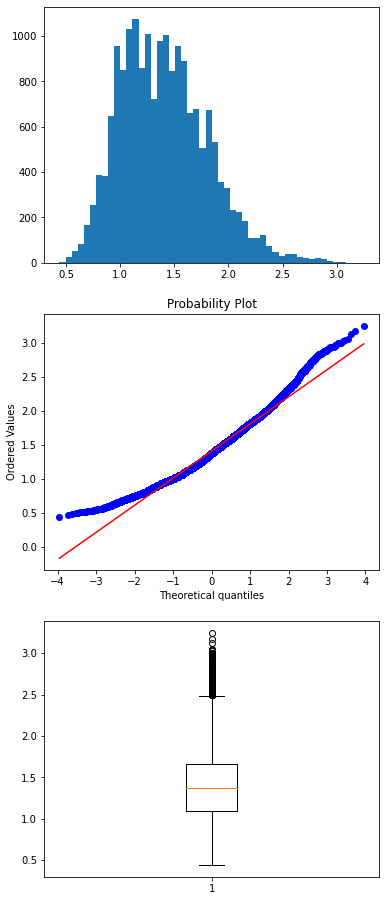

In [13]:
plt.figure(figsize=(6, 16))

plt.subplot(3, 1, 1)
plt.hist(df_target['AveragePrice'], bins=50)

plt.subplot(3, 1, 2)
st.probplot(df_target['AveragePrice'], plot=plt)

plt.subplot(3, 1, 3)
plt.boxplot(df_target['AveragePrice'])

plt.show()

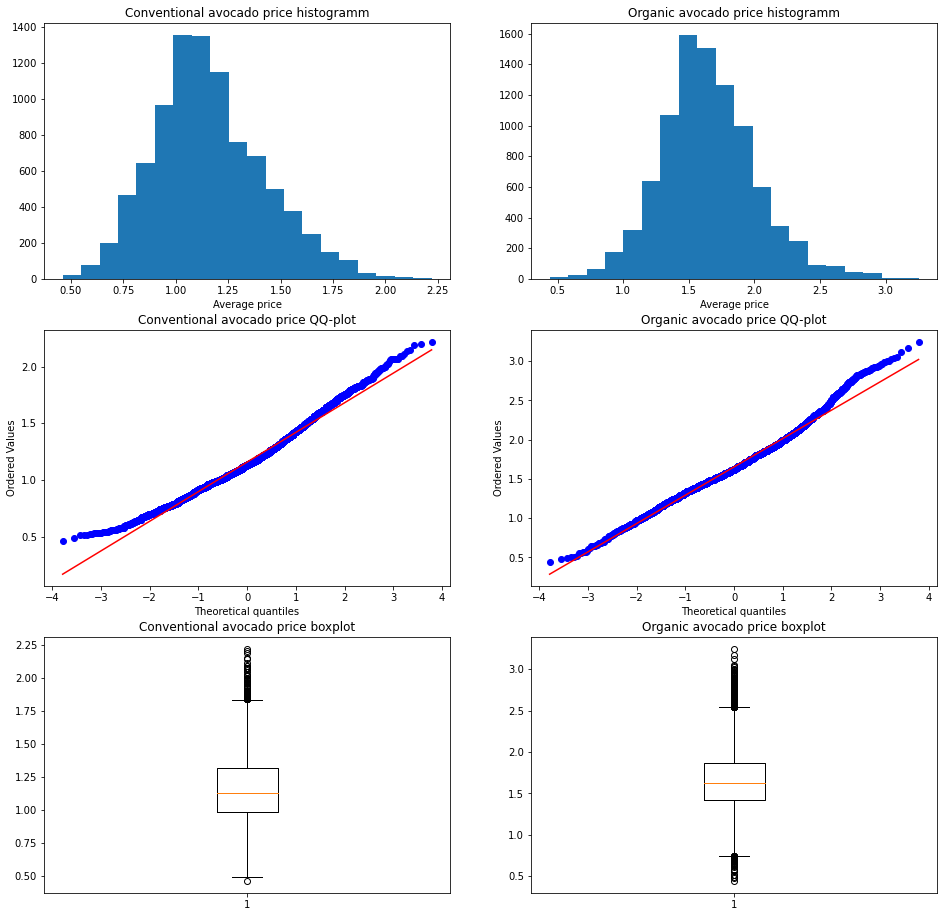

In [14]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.hist(df_conventional, bins=20)
plt.title('Conventional avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 2)
plt.hist(df_organic, bins=20)
plt.title('Organic avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 3)
st.probplot(df_conventional, plot=plt)
plt.title('Conventional avocado price QQ-plot')

plt.subplot(3, 2, 4)
st.probplot(df_organic, plot=plt)
plt.title('Organic avocado price QQ-plot')

plt.subplot(3, 2, 5)
plt.boxplot(df_conventional)
plt.title('Conventional avocado price boxplot')

plt.subplot(3, 2, 6)
plt.boxplot(df_organic)
plt.title('Organic avocado price boxplot')

plt.show()

In [15]:
# Проверяю выборки на нормальность распределения с помощью теста Шапиро-Уилка
st.shapiro(df_conventional)

C:\Users\AVasilev\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9855246543884277, pvalue=1.7820468779708805e-29)

In [16]:
st.shapiro(df_organic)

ShapiroResult(statistic=0.987278401851654, pvalue=8.35322231792404e-28)

Критерий Стьюдента
st.ttest_ind(df_conventional, df_organic)

Критерий Уэлча
st.ttest_ind(df_conventional, df_organic, equal_var=False)

Тест Манна-Уитни
st.mannwhitneyu(df_organic, df_conventional)

Строю доверительные интервалы.  
* Для типа conventional: $n_c=9126,\,\,\, \overline X_c = 1.158,\,\,\, \sigma=0.263,\,\,\, t_{\alpha / 2}=2.262\,\,\, \Rightarrow \bigl[0.151,0.165\bigr]$
* Для типа organic: $n_c=9123,\,\,\, \overline X_c = 1.654,\,\,\, \sigma=0.364,\,\,\, t_{\alpha / 2}=2.262\,\,\, \Rightarrow \bigl[0.645,0.663\bigr]$

In [20]:
print(f'Conventional: n={len(df_conventional)}, mean={df_conventional.mean()}, std={np.std(df_conventional, ddof=1)}, var={np.var(df_conventional, ddof=1)}')
print(f'Organic: n={len(df_organic)}, mean={df_organic.mean()}, std={np.std(df_organic, ddof=1)}, var={np.var(df_organic, ddof=1)}')

Conventional: n=9126, mean=1.1580396668858206, std=0.2630406041140183, var=0.06919035941266771
Organic: n=9123, mean=1.6539986846432082, std=0.3635016200174916, var=0.13213342775534084


In [21]:
(np.abs(df_conventional.mean() - df_organic.mean()) / np.sqrt(np.var(df_conventional, ddof=1) / len(df_organic) + len(df_organic)))

0.0051925053610803245

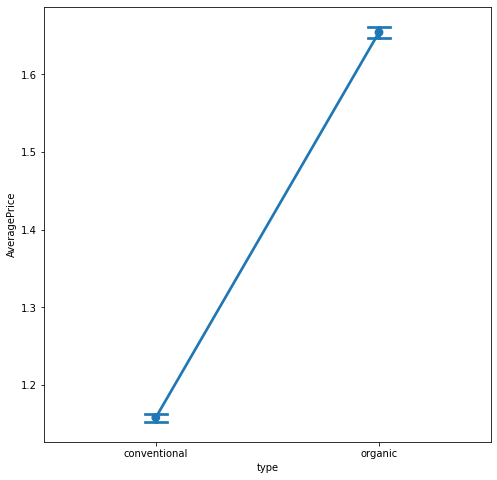

In [22]:
plt.figure(figsize=(8, 8))

sns.pointplot(x='type', y='AveragePrice', data=df_target, capsize=.1)

plt.show()